### Canny Edge Detection
Learn to find edges with Canny Edge Detection

#### Goal
In this chapter, we will learn about

Concept of Canny edge detection
OpenCV functions for that : cv2.Canny()

#### Theory
Canny Edge Detection은 널리 사용되는 가장자리 감지 알고리즘입니다. 이것은 1986 년 John F. Canny에 의해 개발되었습니다. 이것은 다중 단계 알고리즘이며 각 단계를 거치게 될 것입니다.

1. 소음 감소  
가장자리 감지는 이미지의 노이즈에 영향 받기 쉽기 때문에 5x5 가우스 필터를 사용하여 이미지의 노이즈를 제거해야합니다. 이전 장에서 이미 살펴 보았습니다.

2. 이미지의 강도 기울기 찾기  
Smoothhened 이미지는 Sobel 커널로 수평 및 수직 방향으로 필터링되어 수평 방향 ( G_x) 및 수직 방향 ( G_y) 으로 1 차 미분을 얻습니다 . 이 두 이미지에서 다음과 같이 각 픽셀에 대한 에지 그라데이션 및 방향을 찾을 수 있습니다.

가장자리 ![](6_2_1.png)
\ _ 그라데이션 \;  (G) = \ sqrt {G_x ^ 2 + G_y ^ 2} 각도 \;  (\ theta) = \ tan ^ {- 1} \ bigg (\ frac {G_y} {G_x} \ bigg)

그래디언트 방향은 항상 가장자리에 수직입니다. 수직, 수평 및 대각선 방향을 나타내는 4 개의 각도 중 하나로 반올림됩니다.

3. 비 최대 억제
그레디언트의 크기와 방향을 얻은 후 가장자리를 구성하지 않을 수있는 원치 않는 픽셀을 제거하기 위해 이미지의 전체 스캔이 수행됩니다. 이를 위해, 모든 픽셀에서 픽셀은 그라디언트 방향에서 인접 픽셀의 로컬 최대 값인지 확인합니다. 아래 이미지를 확인하십시오.
![](nms.jpg)

최대 억제
점 A는 가장자리에 있습니다 (수직 방향). 경사 방향은 가장자리에 수직입니다. 점 B와 C는 기울기 방향입니다. 그래서 점 A는 점 B와 점 C로 검사되어 극대점을 형성하는지 확인합니다. 그렇다면 다음 단계로 간주되며, 그렇지 않으면 0으로 설정됩니다.

간단히 말해서, 결과는 "얇은 가장자리"가있는 이진 이미지입니다.

4. 히스테리시스 임계 값
이 단계에서는 모든 가장자리가 실제로 가장자리인지 아닌지를 결정합니다. 이를 위해 두 개의 임계 값 인 minVal 과 maxVal이 필요 합니다. 이상의 강도 구배 상관 에지 MAXVAL는 에지 것으로 확인되고, 이후 그 MINVAL가 아닌 모서리 때문에 폐기 될 확실하다. 이 두 임계 값 사이에있는 사람들은 연결성에 따라 가장자리 또는 비 가장자리로 분류됩니다. 픽셀이 "확실한"픽셀에 연결되면 에지의 일부로 간주됩니다. 그렇지 않으면 삭제됩니다. 아래 이미지를 참조하십시오.

![](hysteresis.jpg)

히스테리시스 임계 값
가장자리 A는 maxVal 보다 높 으므로 "확실한 가장자리"로 간주됩니다. 에지 C가 maxVal 보다 낮지 만 에지 A에 연결되어 있으므로 유효 에지로 간주되어 전체 곡선을 얻습니다. 그러나 가장자리 B는 minVal 보다 크고 가장자리 C와 동일한 영역에 있지만 어떤 "확실한 가장자리"에도 연결되어 있지 않으므로 삭제됩니다. 따라서 올바른 결과를 얻으려면 minVal 및 maxVal 을 선택해야합니다 .

이 단계는 또한 가장자리가 긴 선이라는 가정에서 작은 픽셀 노이즈를 제거합니다.

그래서 우리가 마침내 얻을 수있는 것은 이미지의 강한 가장자리입니다.

#### OpenCV에서 Canny Edge Detection
OpenCV는 위의 모든 것을 하나의 함수 cv2.Canny () 에 넣습니다 . 우리는 그것을 어떻게 사용하는지 보게 될 것이다. 첫 번째 인자는 우리의 입력 이미지입니다. 두 번째 및 세 번째 인수는 각각 minVal 및 maxVal 입니다. 세 번째 인자는 aperture_size 입니다. 그것은 이미지 구배 찾기에 사용되는 Sobel 커널의 크기입니다. 기본적으로 3입니다. 마지막 인수는 그라디언트 크기를 찾는 방정식을 지정하는 L2gradient 입니다. 이 경우 사실 , 그것은 그렇지 않으면이 기능을 사용하여,보다 정확한 인 상기의 식을 사용한다 가장자리 \ _ 그라데이션 \;  (G) = | G_x |  + | G_y |. 기본적으로 False 입니다.

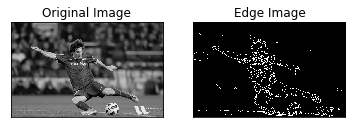

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

img = cv2.imread('messi5.jpg', 0)
edges = cv2.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

#### 추가 자료
1. [위키 피 디아의](https://en.wikipedia.org/wiki/Canny_edge_detector) Canny Edge Detector
2. 빌 그린, 2002 년 [캐니 에지 감지 자습서](http://dasl.mem.drexel.edu/alumni/bGreen/www.pages.drexel.edu/_weg22/can_tut.html) .

#### 연습문제
1. 두 개의 트랙 바를 사용하여 임계 값을 변경할 수있는 Canny Edge 감지를 찾으려면 작은 응용 프로그램을 작성하십시오. 이렇게하면 임계 값의 영향을 이해할 수 있습니다.


In [15]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
minVal,maxVal = 0, 0
src = cv2.imread('messi5.jpg', 0)


def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R', 'image', 0, 500, nothing)
cv2.createTrackbar('G', 'image', 0, 500, nothing)


while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
    
    minVal = cv2.getTrackbarPos('R', 'image')
    maxVal = cv2.getTrackbarPos('G', 'image')
    
    edges = cv2.Canny(src, minVal, maxVal  )
    
    cv2.imshow('result', edges)
    

cv2.destroyAllWindows()